In [152]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,recall_score,precision_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

from keras.layers import Dense
from keras.models import Sequential



In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.groupby(by='quality')['alcohol'].mean()

quality
3     9.955000
4    10.265094
5     9.899706
6    10.629519
7    11.465913
8    12.094444
Name: alcohol, dtype: float64

In [7]:
df.groupby(by='quality')['residual sugar'].mean()

quality
3    2.635000
4    2.694340
5    2.528855
6    2.477194
7    2.720603
8    2.577778
Name: residual sugar, dtype: float64

In [8]:
df.groupby(by='quality')['fixed acidity'].mean()

quality
3    8.360000
4    7.779245
5    8.167254
6    8.347179
7    8.872362
8    8.566667
Name: fixed acidity, dtype: float64

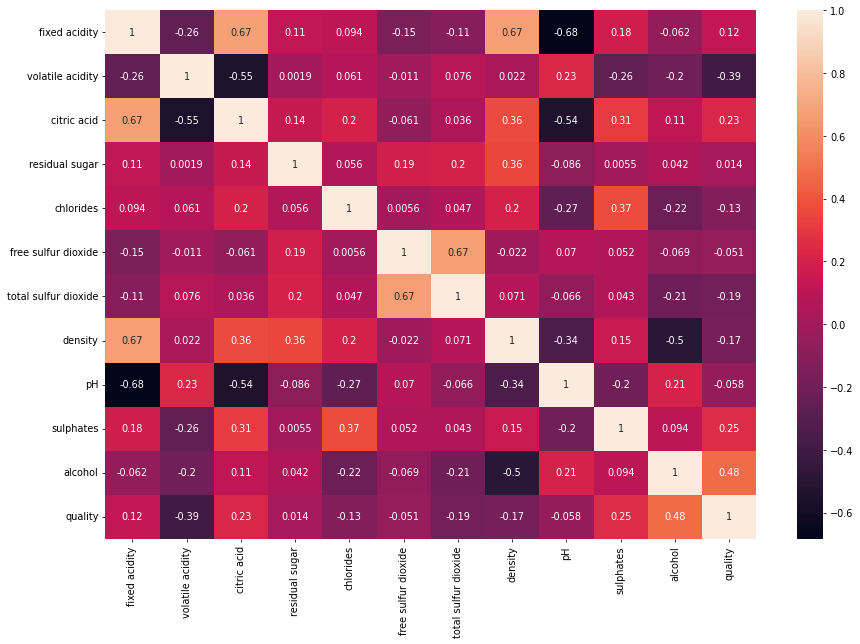

In [64]:
plt.figure(figsize=(15,10),dpi=70)
sns.heatmap(df.corr(),annot=True)
plt.show()

In [65]:
px.scatter(data_frame=df,x='fixed acidity',y='quality',color='pH')

In [57]:
px.scatter(data_frame=df,x='alcohol',y='quality',color='pH')

In [67]:
px.scatter(data_frame=df,x='fixed acidity',y='density',color='quality')

In [68]:
px.scatter(data_frame=df,x='citric acid',y='alcohol',color='quality')

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

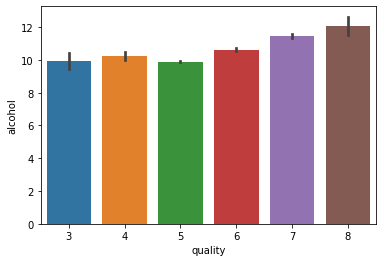

In [74]:
sns.barplot(x='quality',y='alcohol',data=df)


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

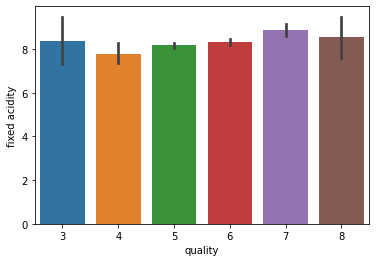

In [76]:
sns.barplot(x='quality',y='fixed acidity',data=df)


<AxesSubplot:xlabel='quality', ylabel='pH'>

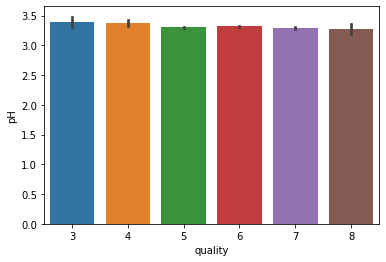

In [77]:
sns.barplot(x='quality',y='pH',data=df)


In [83]:
def NQ(data):
    if data >= 6.5:
        return 'Good'
    else:
        return 'Bad'

df['NN'] = df['quality'].apply(NQ)

In [84]:
df['NN'].value_counts()

Bad     1382
Good     217
Name: NN, dtype: int64

In [85]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,NN
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bad


In [90]:
le = LabelEncoder()
df['NN']=le.fit_transform(df['NN'])

In [91]:
df['NN'].value_counts()

0    1382
1     217
Name: NN, dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  NN                    1599 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 156.3 KB


In [127]:
features = df.drop(['quality','NN'],axis=1)
target = df['NN']

In [128]:
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [153]:
x_train , x_test,  y_train , y_test = train_test_split(features,target,test_size=0.2,random_state=100)

In [154]:
scaller = StandardScaler()
xtr_scalled = pd.DataFrame(data=scaller.fit_transform(x_train),columns=x_train.columns)
xts_scalled = pd.DataFrame(data=scaller.transform(x_test),columns=x_test.columns)

In [155]:
xtr_scalled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.016822,-1.501219,0.762896,-0.372697,-0.175715,-0.460405,-0.589151,0.336801,-0.621028,0.835990,-0.940304
1,0.326517,1.187202,-0.467356,-0.036557,-0.238726,-0.077750,0.043506,0.331513,-0.685141,-1.099005,-0.658202
2,-0.302939,0.328016,0.301551,-0.372697,-0.301737,0.783223,2.212616,0.019507,-0.364576,-0.688551,-0.940304
3,-0.817948,1.298065,-1.287525,-0.171013,-0.532778,1.835523,0.495404,0.389684,1.687036,0.718718,-0.470134
4,0.669857,1.381212,-0.262314,-0.439925,-0.238726,-0.938723,-0.438519,1.077154,-0.300463,-0.571279,0.188105
...,...,...,...,...,...,...,...,...,...,...,...
1274,0.154847,-0.836043,0.455333,0.299582,-0.154711,1.357205,2.182489,0.125272,-0.685141,-0.571279,-0.940304
1275,1.356536,0.771467,-0.262314,0.097898,0.391385,0.113577,-0.378266,1.923272,-0.172238,1.891442,-0.470134
1276,-0.016822,0.522026,-0.364835,-0.708837,-0.175715,1.070214,2.182489,0.231037,-0.941592,2.712349,-1.222406
1277,-0.703502,0.438879,-1.287525,-0.036557,-0.154711,0.113577,1.218440,0.363243,1.110020,-0.336734,-0.658202


In [156]:
xts_scalled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.302939,0.937761,-1.082483,-0.439925,-0.196719,0.400568,-0.348139,-0.255481,0.597117,0.190992,0.470207
1,-0.245716,-1.889238,0.762896,-0.641609,-0.658800,0.209241,-0.498772,-1.461199,-0.108125,0.190992,0.752309
2,-0.932395,0.050859,-0.723659,-0.372697,-0.259730,-0.077750,-0.318013,0.283919,1.943487,-0.102189,-0.564168
3,-0.817948,1.713800,-0.313575,1.039089,-0.301737,0.017914,0.555657,0.876202,1.430584,0.366900,-1.097027
4,-0.531832,0.577457,-0.877441,-0.103785,-0.175715,0.017914,-0.408392,0.315649,1.751149,0.190992,0.376173
...,...,...,...,...,...,...,...,...,...,...,...
315,-0.875172,0.328016,-1.082483,2.316420,-0.595789,-0.460405,-0.860290,-0.297787,0.661230,-0.395370,0.376173
316,-1.104065,1.436643,-1.185004,-0.238241,-0.574785,-0.460405,-0.890417,-0.467010,1.430584,-0.043553,0.000037
317,0.898750,-1.445788,1.121720,1.644141,-0.133708,-0.651732,-0.890417,-1.016987,-0.749254,-0.805824,1.974752
318,0.440964,-0.725180,1.531804,1.375229,-0.175715,-0.938723,-0.800037,-0.128563,-0.172238,-0.512643,1.974752


In [157]:
lg = LogisticRegression()
lg.fit(xtr_scalled,y_train)
predictionl = lg.predict(xts_scalled)
score = f1_score(y_test,predictionl)
accuracy = accuracy_score(y_test,predictionl)
precision = precision_score(y_test,predictionl)
recall = recall_score(y_test,predictionl)
m1 = pd.DataFrame({"score":score,'recall':recall,'precision':precision,'accuraccy':accuracy},index=['LogisticRegression'])
m1.head()

,score,recall,precision,accuraccy
LogisticRegression,0.459016,0.4,0.538462,0.896875


In [158]:
sv = SVC()
sv.fit(xtr_scalled,y_train)
predictions = sv.predict(xts_scalled)
score = f1_score(y_test,predictions)
accuracy = accuracy_score(y_test,predictions)
precision = precision_score(y_test,predictions)
recall = recall_score(y_test,predictions)
m2 = pd.DataFrame({"score":score,'recall':recall,'precision':precision,'accuraccy':accuracy},index=['SVC'])
m2.head()

,score,recall,precision,accuraccy
SVC,0.40678,0.342857,0.5,0.890625


In [159]:
knn = KNeighborsClassifier()
knn.fit(xtr_scalled,y_train)
predictionk = knn.predict(xts_scalled)
score = f1_score(y_test,predictionk)
accuracy = accuracy_score(y_test,predictionk)
precision = precision_score(y_test,predictionk)
recall = recall_score(y_test,predictionk)
m3 = pd.DataFrame({"score":score,'recall':recall,'precision':precision,'accuraccy':accuracy},index=['KNeighbors'])
m3.head()

,score,recall,precision,accuraccy
KNeighbors,0.461538,0.514286,0.418605,0.86875


In [160]:
tr = DecisionTreeClassifier()
tr.fit(xtr_scalled,y_train)
predictiont = tr.predict(xts_scalled)
score = f1_score(y_test,predictiont)
accuracy = accuracy_score(y_test,predictiont)
precision = precision_score(y_test,predictiont)
recall = recall_score(y_test,predictiont)
m4 = pd.DataFrame({"score":score,'recall':recall,'precision':precision,'accuraccy':accuracy},index=['DecisionTree'])
m4.head()

,score,recall,precision,accuraccy
DecisionTree,0.613636,0.771429,0.509434,0.89375


In [161]:
fr = RandomForestClassifier()
fr.fit(xtr_scalled,y_train)
predictionf = fr.predict(xts_scalled)
score = f1_score(y_test,predictionf)
accuracy = accuracy_score(y_test,predictionf)
precision = precision_score(y_test,predictionf)
recall = recall_score(y_test,predictionf)
m5 = pd.DataFrame({"score":score,'recall':recall,'precision':precision,'accuraccy':accuracy},index=['RandomForest'])
m5.head()

,score,recall,precision,accuraccy
RandomForest,0.676471,0.657143,0.69697,0.93125


In [162]:
xgb = XGBClassifier()
xgb.fit(xtr_scalled,y_train)
predictionx = xgb.predict(xts_scalled)
score = f1_score(y_test,predictionx)
accuracy = accuracy_score(y_test,predictionx)
precision = precision_score(y_test,predictionx)
recall = recall_score(y_test,predictionx)
m6 = pd.DataFrame({"score":score,'recall':recall,'precision':precision,'accuraccy':accuracy},index=['XGB'])
m6.head()

,score,recall,precision,accuraccy
XGB,0.631579,0.685714,0.585366,0.9125


In [163]:
n_estimators = [int(x) for x in np.linspace(100,2000,20)]
criterion = ['gini',"entropy"]
max_depth = [int(x) for x in np.linspace(1,10,10)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,5]
max_features = ['auto','sqrt','log2']
bootstrap = [False,True]

params = {
    'n_estimators':n_estimators,
    'criterion' :criterion,
    'max_depth' :max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf' :min_samples_leaf,
    'max_features': max_features,
    'bootstrap': bootstrap
}

In [164]:
fr = RandomForestClassifier()
fr_grid = RandomizedSearchCV(estimator=fr, param_distributions=params,n_iter=100,cv=3,n_jobs=-1,verbose=2)
fr_grid.fit(xtr_scalled,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [False, True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
           

In [165]:
predictionfg = fr_grid.best_estimator_.predict(xts_scalled)
score = f1_score(y_test,predictionfg)
accuracy = accuracy_score(y_test,predictionfg)
precision = precision_score(y_test,predictionfg)
recall = recall_score(y_test,predictionfg)
m6 = pd.DataFrame({"score":score,'recall':recall,'precision':precision,'accuraccy':accuracy},index=['RandomForest_Tunned'])
m6.head()

,score,recall,precision,accuraccy
RandomForest_Tunned,0.606061,0.571429,0.645161,0.91875


In [168]:
result = pd.concat([m1,m2,m3,m4,m5,m6],axis=0)

In [169]:
result

,score,recall,precision,accuraccy
LogisticRegression,0.459016,0.400000,0.538462,0.896875
SVC,0.406780,0.342857,0.500000,0.890625
KNeighbors,0.461538,0.514286,0.418605,0.868750
DecisionTree,0.613636,0.771429,0.509434,0.893750
RandomForest,0.676471,0.657143,0.696970,0.931250
RandomForest_Tunned,0.606061,0.571429,0.645161,0.918750
